In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
usedcars = pd.read_csv("usedcars_noisy.csv",index_col=0)

In [3]:
usedcars.head(10)

,model,price,mileage,color,transmission
year,,,,,
2011,SEL,21992,7413,Yellow,AUTO
2011,SEL,20995,10926,Gray,AUTO
2011,SEL,29995,-1,Gray,AUTO
2011,SEL,19995,7351,Silver,AUTO
2011,SEL,17809,11613,Gray,AUTO
2012,SE,17500,8367,White,AUTO
2010,SEL,17495,25125,Silver,AUTO
2010,SES,0,-1,Silver,AUTO
2011,SEL,17000,27393,Blue,AUTO


We can see there are some noise in our data. some price variable values as 0 and -1 for mileage which is completely wrong as no car can have price zero or a mileage in negative. So Let's clean our data first.

In [4]:
price_mean= usedcars['price'].mean()

In [5]:
price_mean

12717.55

In [6]:
mileage_median= usedcars['mileage'].median()

In [7]:
mileage_median

36120.0

Replace the noisy price and mileage data with the mean price and median mileage, respectively.

In [8]:
usedcars.price=usedcars.price.replace({0:price_mean})

In [9]:
usedcars.mileage=usedcars.mileage.replace({-1:mileage_median})

In [15]:
usedcars.model.unique()

array(['SEL', 'SE', 'SES'], dtype=object)

In [16]:
usedcars.model=usedcars.model.replace({'SEL':1, 'SE':2,'SES':3})

In [35]:
usedcars.color.unique()

array(['Yellow', 'Gray', 'Silver', 'White', 'Blue', 'Black', 'Green',
       'Red', 'Gold'], dtype=object)

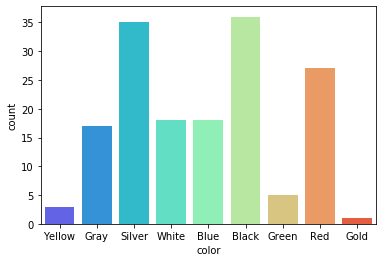

In [26]:
sns.countplot(x='color', palette='rainbow', data=usedcars)

In [33]:
usedcars.transmission=usedcars.transmission.replace({1:0, 2:1})

In [36]:
usedcars.color=usedcars.color.replace({'Yellow':0, 'Gray':1, 'Silver':2, 'White':3, 'Blue':4, 'Black':5, 'Green':6,'Red':7, 'Gold':8})

In [38]:
usedcars.tail(10)

,model,price,mileage,color,transmission
year,,,,,
2004,3,6980.00,101130.0,1,0
2004,3,6950.00,119720.0,5,0
2006,3,6200.00,95000.0,2,0
2002,2,5995.00,87003.0,7,0
2000,2,5980.00,96841.0,7,0
2001,2,4899.00,151479.0,0,0
2000,2,3800.00,109259.0,7,0
2010,3,12717.55,16035.0,7,1
2005,3,8488.00,36120.0,7,0


In [39]:
from sklearn.model_selection import train_test_split

In [41]:
x= usedcars.drop('price', axis=1)

In [43]:
y= usedcars['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm= LinearRegression()

In [47]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lm.coef_

array([-5.09997990e+02, -9.38200120e-02, -2.86411730e+02, -4.33890185e+02])

In [49]:
predictions= lm.predict(X_test)

In [52]:
predictions[0]

13952.759891339592

In [60]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
model,-509.997990
mileage,-0.093820
color,-286.411730
transmission,-433.890185


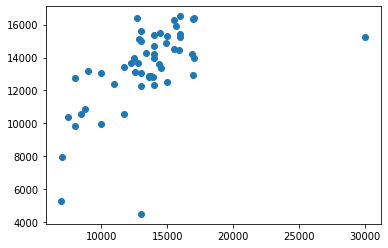

In [61]:
plt.scatter(y_test,predictions)

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1830.0098474827475
MSE: 8697906.259948697
RMSE: 2949.221297215368


In [64]:
clf.score(X_test, y_test)

NameError: name 'clf' is not defined